# KEYTAR SAMPLE WAVEFORM (Using Scipy)

Python Generated Waveform:


<IPython.core.display.Javascript object>


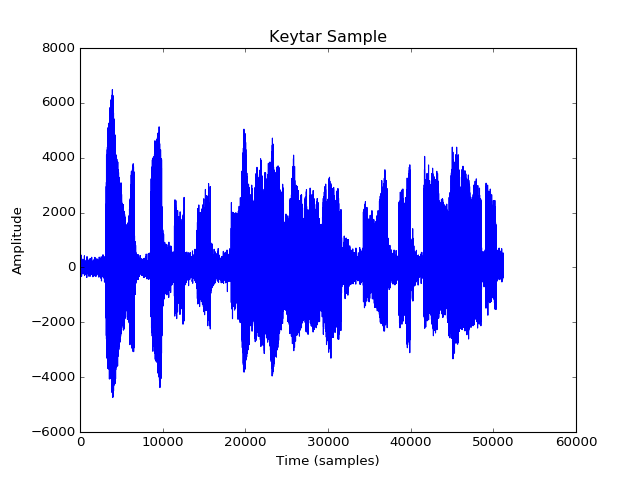

In [5]:
import numpy as np
import scipy
from scipy.io.wavfile import read
import matplotlib.pyplot as plt
#from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook

print('Python Generated Waveform:')
# read audio samples
input_data = read("AWESOME KEYTAR RIFF.wav")
audio = input_data[1]

# Plotting the first 51200 samples, or roughly three seconds
plt.plot(audio[0:51200])

# Labels
plt.ylabel("Amplitude")
plt.xlabel("Time (samples)")

# Title
plt.title("Keytar Sample")

# Display

plt.show()



Comparison Waveform generated using Audacity software


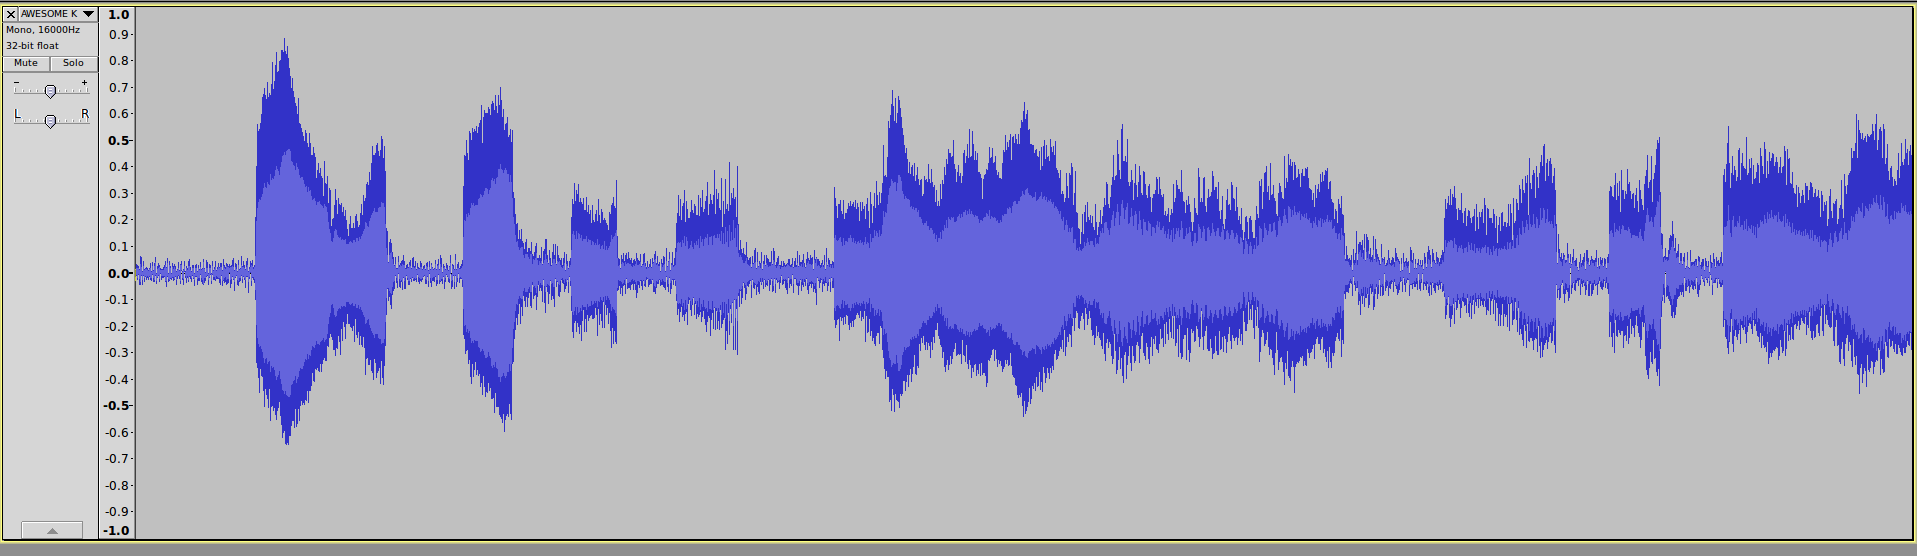

In [2]:
print('Comparison Waveform generated using Audacity software')

from IPython.core.display import Image 
Image('Audacity Waveform.png') 

# SPECTRUM ANALYSIS

<IPython.core.display.Javascript object>


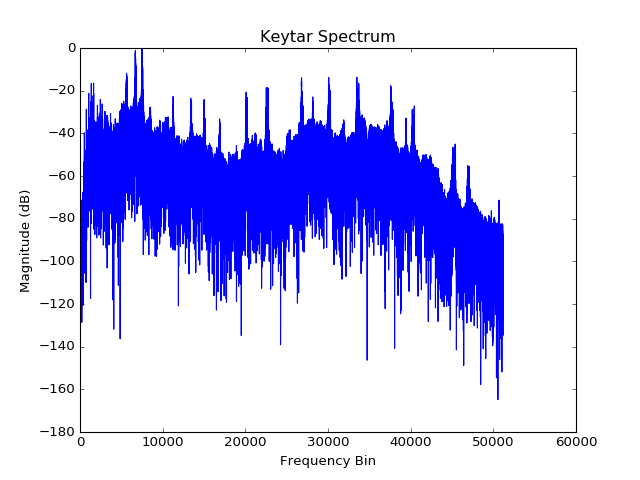

In [3]:
from scipy.io.wavfile import read
from scipy.signal import hann
from scipy.fftpack import rfft
import matplotlib.pyplot as plt

# read audio samples

input_data = read("AWESOME KEYTAR RIFF.wav")
audio = input_data[1]

# apply a Hanning window
window = hann(51200)
audio = audio[0:51200]*window

# From Descrete Fourier Transform package in SciPy, this does the Discrete Fourier transform of a real sequence
mags = abs(rfft(audio))

# Convert to dB
mags = 20*scipy.log10(mags)

# Normalise to 0 dB max
mags -= max(mags)

# Labels
plt.ylabel("Magnitude (dB)")
plt.xlabel("Frequency Bin")

# Title
plt.title("Keytar Spectrum")
plt.show()

# Plot
plt.plot(mags)

# PARTIALS, PEAKS, OR OVERTONES (Using Smpl for better sinusodial modeling)

http://simplsound.sourceforge.net/
http://sndobj.sourceforge.net/

Clone the repository:
$ git clone git://simplsound.git.sourceforge.net/gitroot/simplsound/simplsound 

Then download:
$ python setup.py install

Note: since the "simpl" and " SndObj" libraries are primarily supported in Python 2, I use the "pip" installer to get things rolling

In [ ]:
import simpl

# read audio samples
audio = read("AWESOME KEYTAR RIFF.wav")[1]

# take just the first few frames
audio = audio[0:4096]

# Peak detection with "SndObj"
pd = simpl.SndObjPeakDetection()
pd.max_peaks = 20
pks = pd.find_peaks(audio)

# Partial Tracking with the McAulay-Quatieri algorithm
pt = simpl.MQPartialTracking()
pt.max_partials = 20
partls = pt.find_partials(pks)

# plot the detected partials
simpl.plot.plot_partials(partls)


# set title and label axes
plt.title("Keytar Partials")
plt.ylabel("Frequency (Hz)")
plt.xlabel("Frame Number")

plt.show()